In [1]:
%cd ..

/home/pauline/Dokumente/Delab_Projekt/delab


In [2]:
import pandas as pd

In [3]:
from util.sql_switch import get_query_native

authors_tweets = get_query_native(
    "SELECT ta.id as author_id, conversation_id, screen_name , is_climate_author, climate_author_type FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
clauthors_tweets = authors_tweets.loc[authors_tweets['is_climate_author']== True]


clauthors_tweets = clauthors_tweets.replace(['non-governmental organisation'], 'NGO')
clauthors_tweets = clauthors_tweets.groupby(["author_id", "screen_name", "climate_author_type","conversation_id"]).mean()

c_cam = get_query_native(
    "SELECT author_id, is_root_author, c.conversation_id, depth, branching_factor, centrality, baseline_vision, n_posts FROM delab_conversation c, delab_conversationauthormetrics cam WHERE c.conversation_id=cam.conversation_id")
c_cam = c_cam.groupby(["author_id", "conversation_id"]).mean()

analysis = clauthors_tweets.join(c_cam)
analysis_flattened = analysis.reset_index()
analysis_flattened

using postgres
using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,author_id,conversation_id,screen_name,climate_author_type,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts
0,1,1575916410295009308,mnyomb1,activist,1.0,1.0,3.0,5.0,3.500000,0.500000,1.0
1,1,1578084206940487680,mnyomb1,activist,1.0,1.0,3.0,5.0,2.000000,0.250000,2.0
2,1,1582639690309828609,mnyomb1,activist,1.0,1.0,6.0,59.0,14.138889,0.185547,3.0
3,1,1585616351493820416,mnyomb1,activist,1.0,1.0,3.0,21.0,1.444444,0.118056,9.0
4,1,1597566310191624196,mnyomb1,activist,1.0,1.0,9.0,20.0,1.100000,0.057031,10.0
...,...,...,...,...,...,...,...,...,...,...,...
259,1613,1618056576648245248,hausfath,scientist,1.0,0.0,8.0,29.0,1.111111,0.039225,3.0
260,1613,1619020170940538880,hausfath,scientist,1.0,1.0,14.0,147.0,3.802841,0.044434,16.0
261,1616,1619456016638427136,ed_hawkins,scientist,1.0,1.0,5.0,137.0,22.100000,0.156250,5.0
262,1617,1619442074990055425,PeterGleick,scientist,1.0,0.0,14.0,144.0,4.015385,0.093750,1.0


In [5]:
authors_tweets = get_query_native(
    "SELECT ta.id as author_id, conversation_id, screen_name , is_climate_author, climate_author_type FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
clauthors_tweets = authors_tweets.loc[authors_tweets['is_climate_author']== True]
len(clauthors_tweets.groupby('author_id').count())

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


59

In [40]:
author = analysis.groupby('author_id').count()


,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts
author_id,,,,,,,
1,8,8,8,8,8,8,8
33,13,13,13,13,13,13,13
93,24,24,24,24,24,24,24
95,31,31,31,31,31,31,31
103,4,4,4,4,4,4,4
286,2,2,2,2,2,2,2
290,1,1,1,1,1,1,1
295,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1


In [7]:
tweet_ids = get_query_native(
                "SELECT conversation_id FROM delab_tweet")
tweet_ids
tweet_count = tweet_ids['conversation_id'].value_counts()
tweet_count = tweet_count.to_frame()
tweet_count = tweet_count.rename(columns={"conversation_id":"n_posts"})
tweet_count['conversation_id'] = tweet_count.index
tweet_count

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,n_posts,conversation_id
1615613038962540546,262,1615613038962540546
1619817676481892353,233,1619817676481892353
1617146314642395136,215,1617146314642395136
1617069014785687552,191,1617069014785687552
1618896460267008000,180,1618896460267008000
...,...,...
1615347535328968704,6,1615347535328968704
1612348494936776704,6,1612348494936776704
1583744976261120001,6,1583744976261120001
1610833466983174144,6,1610833466983174144


In [8]:
mapped_columns = dict(zip(tweet_count.conversation_id, tweet_count.n_posts))
analysis_flattened["total_counts"] = analysis_flattened["conversation_id"].map(mapped_columns)
analysis_flattened

,author_id,conversation_id,screen_name,climate_author_type,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,total_counts
0,1,1575916410295009308,mnyomb1,activist,1.0,1.0,3.0,5.0,3.500000,0.500000,1.0,6
1,1,1578084206940487680,mnyomb1,activist,1.0,1.0,3.0,5.0,2.000000,0.250000,2.0,6
2,1,1582639690309828609,mnyomb1,activist,1.0,1.0,6.0,59.0,14.138889,0.185547,3.0,60
3,1,1585616351493820416,mnyomb1,activist,1.0,1.0,3.0,21.0,1.444444,0.118056,9.0,22
4,1,1597566310191624196,mnyomb1,activist,1.0,1.0,9.0,20.0,1.100000,0.057031,10.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...
259,1613,1618056576648245248,hausfath,scientist,1.0,0.0,8.0,29.0,1.111111,0.039225,3.0,30
260,1613,1619020170940538880,hausfath,scientist,1.0,1.0,14.0,147.0,3.802841,0.044434,16.0,148
261,1616,1619456016638427136,ed_hawkins,scientist,1.0,1.0,5.0,137.0,22.100000,0.156250,5.0,138
262,1617,1619442074990055425,PeterGleick,scientist,1.0,0.0,14.0,144.0,4.015385,0.093750,1.0,145


## Analyse
- Nach climate_author_type analysieren
- Fragen:
    - in wievielen Konversationen sind die Autoren durchschnittlich vertreten?
    - welche Zentralität haben die AUtoren durchschnittlich?
    - welche root dominance haben die Autoren durchschnittlich?
    - welchen branching_factor und welche depth haben die Konversationen, in denen die Autoren root auhtor sind duchschnittlich?
    

In [9]:
climate_analysis = analysis_flattened.groupby(['climate_author_type']).mean()
climate_analysis = climate_analysis.drop(columns=['author_id', 'conversation_id', 'is_climate_author', 'is_root_author' ])
#climate_analysis = climate_analysis.drop('journalist') #bisher sind alle ergebnisse für journalists NaN, deswegen werden wir sie nicht betrachten
climate_analysis

,depth,branching_factor,centrality,baseline_vision,n_posts,total_counts
climate_author_type,,,,,,
NGO,4.927536,24.463768,11.818320,0.372813,2.246377,25.521739
activist,5.052632,34.473684,11.687619,0.328630,2.710526,37.236842
journalist,6.705882,43.588235,18.575118,0.275176,2.823529,44.588235
organisation,3.386364,24.840909,20.833065,0.446139,1.659091,26.250000
politician,4.937500,32.000000,14.388318,0.298388,2.062500,33.000000
scientist,6.594937,41.810127,11.096751,0.279312,2.835443,42.387500


In [10]:
import matplotlib.pyplot as plt
import numpy as np

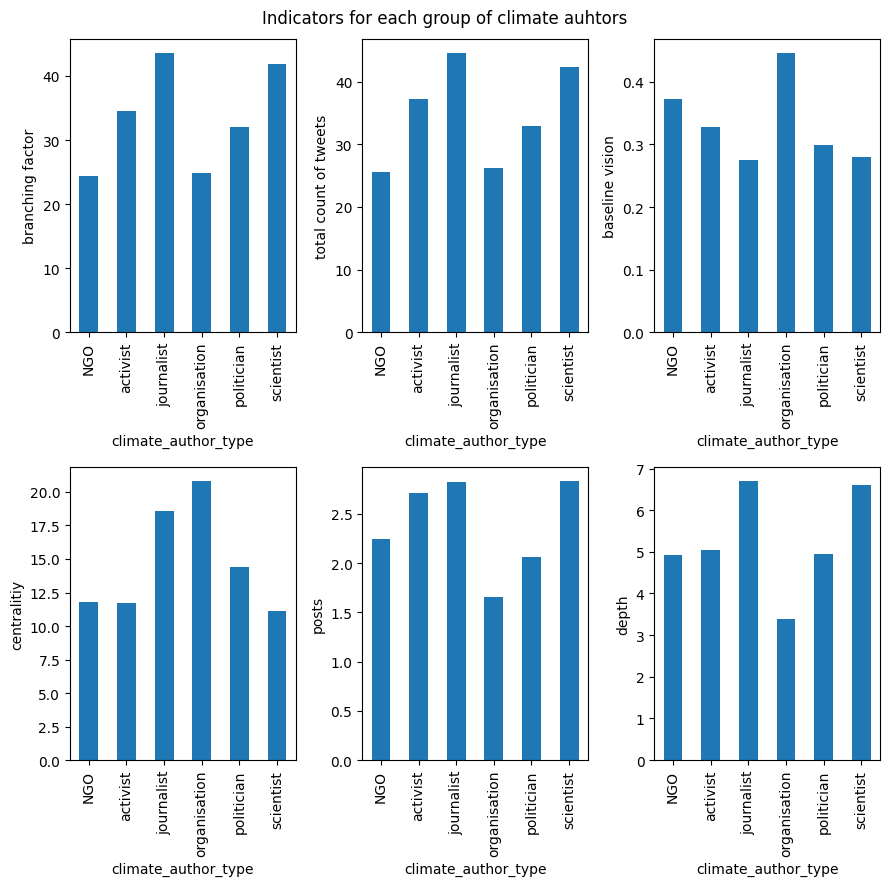

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(9,9))
fig.suptitle("Indicators for each group of climate auhtors")

ax1 = climate_analysis['branching_factor'].plot.bar(ax=axes[0,0])
ax1.set_ylabel("branching factor")

ax2 = climate_analysis['total_counts'].plot.bar(ax=axes[0,1])
ax2.set_ylabel("total count of tweets")

ax3 = climate_analysis['centrality'].plot.bar(ax=axes[1,0])
ax3.set_ylabel("centralitiy")

ax4 = climate_analysis['n_posts'].plot.bar(ax=axes[1,1])
ax4.set_ylabel("posts");

ax5 = climate_analysis['baseline_vision'].plot.bar(ax=axes[0,2])
ax5.set_ylabel("baseline vision")

ax6 = climate_analysis['depth'].plot.bar(ax=axes[1,2])
ax6.set_ylabel("depth");

In [17]:
analysis_flattened.describe()

,author_id,conversation_id,is_climate_author,is_root_author,depth,branching_factor,centrality,baseline_vision,n_posts,total_counts
count,264.000000,2.640000e+02,264.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,264.000000
mean,320.583333,1.607306e+18,1.0,0.920152,5.304183,32.878327,13.683962,0.339772,2.418251,34.121212
std,246.960567,1.161602e+16,0.0,0.271574,3.920812,39.956852,21.363228,0.175330,2.994902,39.933696
min,1.000000,1.575844e+18,1.0,0.000000,2.000000,5.000000,0.000000,0.018519,1.000000,6.000000
25%,95.000000,1.599744e+18,1.0,1.000000,3.000000,9.000000,3.000000,0.166667,1.000000,10.000000
50%,377.000000,1.612059e+18,1.0,1.000000,4.000000,17.000000,6.666667,0.500000,1.000000,18.000000
75%,407.000000,1.616363e+18,1.0,1.000000,6.500000,40.000000,13.791667,0.500000,3.000000,41.000000
max,1617.000000,1.619818e+18,1.0,1.000000,30.000000,261.000000,183.267677,0.500000,27.000000,262.000000


<AxesSubplot:xlabel='x1', ylabel='total_counts'>

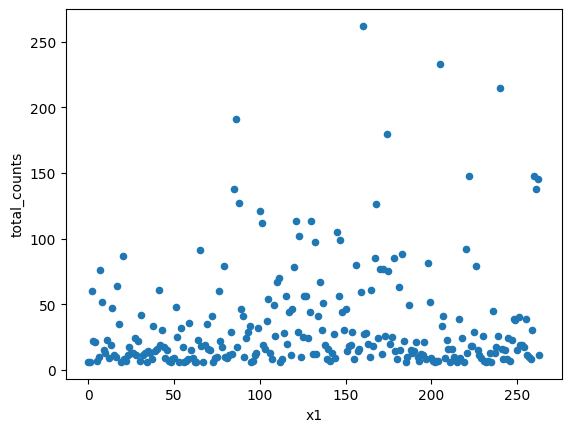

In [18]:
scatter_analysis = analysis_flattened.reset_index()
scatter_analysis = scatter_analysis[scatter_analysis.total_counts > 1]
scatter_analysis['x1'] = scatter_analysis.index
scatter_analysis
scatter_analysis.plot.scatter(x='x1', y="total_counts")

<AxesSubplot:xlabel='x1', ylabel='branching_factor'>

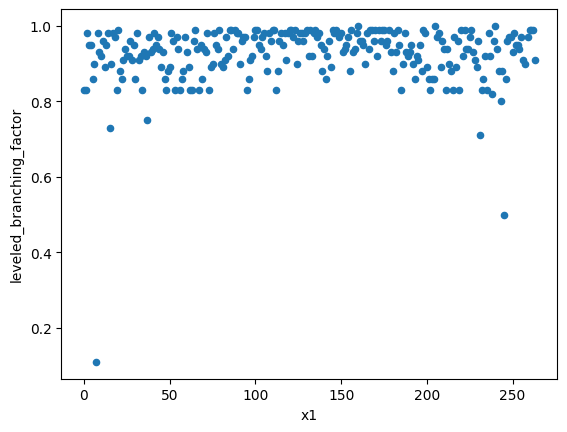

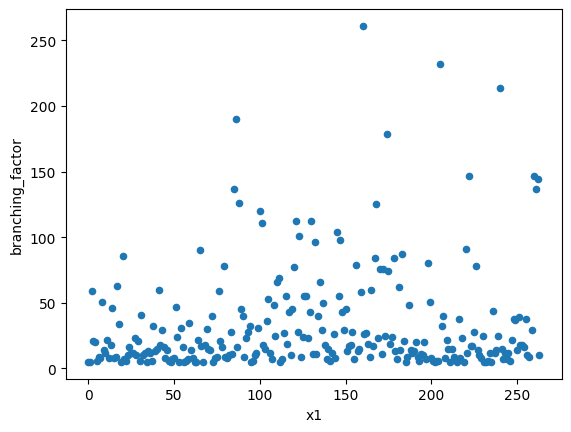

In [19]:
scatter_analysis['leveled_branching_factor']= (scatter_analysis["branching_factor"]/scatter_analysis["total_counts"]).round(2)
scatter_analysis.plot.scatter(x='x1', y="leveled_branching_factor")
scatter_analysis.plot.scatter(x='x1', y="branching_factor")
#Teilen durch total_counts hilft gegen ausreißer

In [20]:
scatter_analysis_case_study = scatter_analysis[scatter_analysis["leveled_branching_factor"] < 0.75]
scatter_analysis_case_study
print(scatter_analysis["leveled_branching_factor"].mean())


0.9263117870722434


<AxesSubplot:xlabel='x1', ylabel='leveled_depth'>

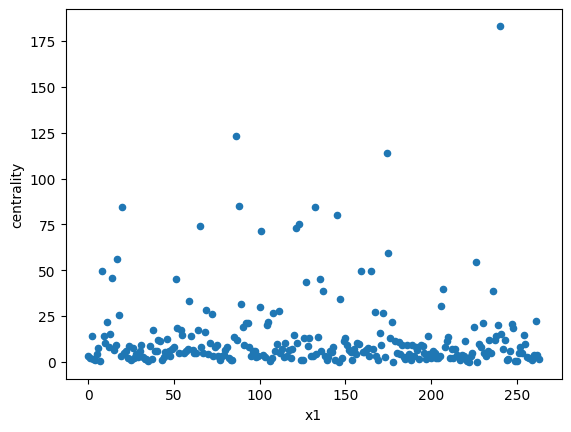

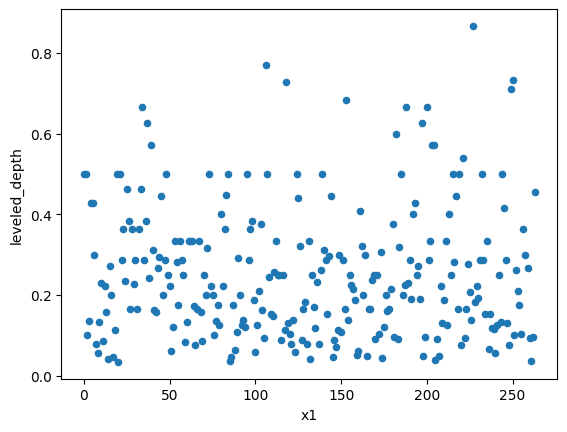

In [21]:
scatter_analysis.plot.scatter(x='x1', y="centrality")
scatter_analysis['leveled_depth']= (scatter_analysis["depth"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_depth")

<AxesSubplot:xlabel='x1', ylabel='leveled_centrality'>

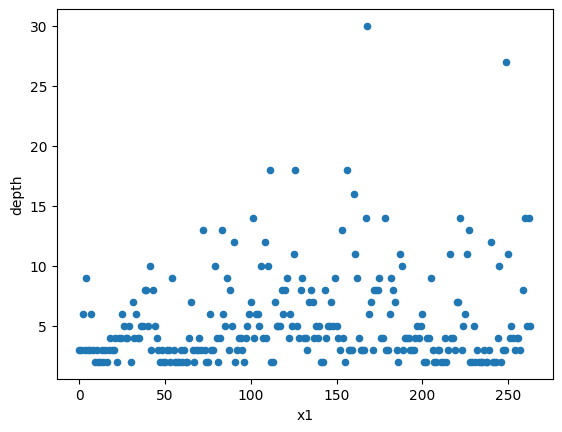

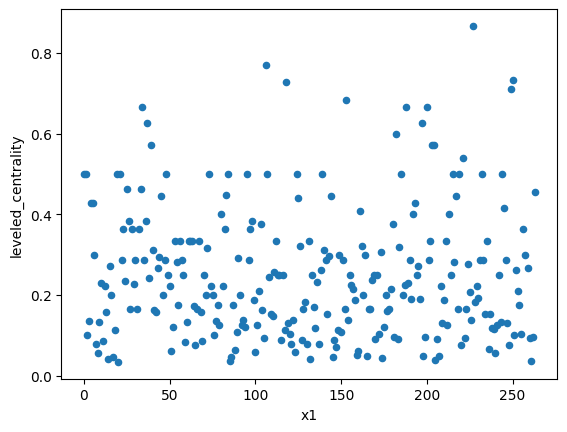

In [22]:
scatter_analysis.plot.scatter(x='x1', y="depth")
scatter_analysis['leveled_centrality']= (scatter_analysis["depth"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_centrality")

<AxesSubplot:xlabel='x1', ylabel='leveled_baseline_vision'>

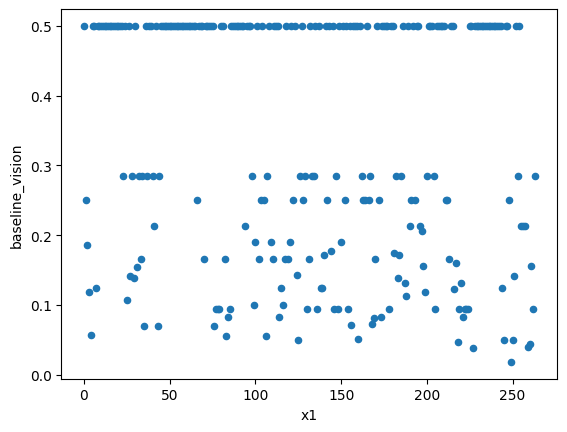

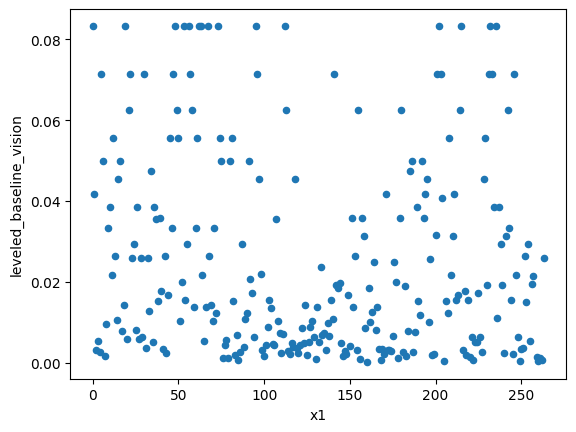

In [23]:
scatter_analysis.plot.scatter(x='x1', y="baseline_vision")
scatter_analysis['leveled_baseline_vision']= (scatter_analysis["baseline_vision"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_baseline_vision")
#Macht es hier Sinn durch die Anzahl der Tweets in der Konversation zu teilen?

<AxesSubplot:xlabel='x1', ylabel='leveled_posts'>

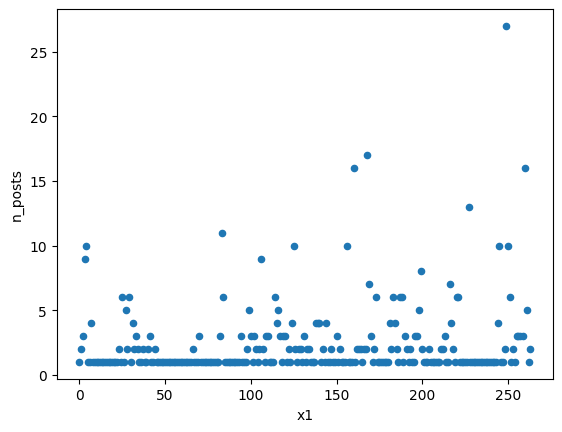

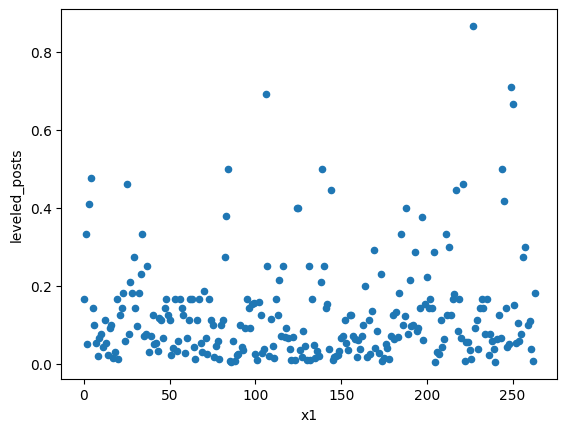

In [24]:
scatter_analysis.plot.scatter(x='x1', y="n_posts")
scatter_analysis['leveled_posts']= (scatter_analysis["n_posts"]/scatter_analysis["total_counts"])
scatter_analysis.plot.scatter(x='x1', y="leveled_posts")

Konversation 3 viele Posts vom Root author aber baseline vision vom root author besonders niedrig

In [25]:
scatter_analysis
leveled_analysis = scatter_analysis.groupby(["climate_author_type"]).mean()
leveled_analysis = leveled_analysis.drop('journalist')

In [36]:
clauthors = get_query_native(
            "SELECT * FROM delab_climateauthor")
authors = analysis.groupby('screen_name').count()
not_authors = clauthors.merge(authors, how='left')

using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False